## Project Overview & Executive Summary (Introduction)

This project investigates a large dataset of recipe reviews to illustrate the **end-to-end workflow of a data analyst**.  
The work is structured into progressive blocks:  

- **Data preparation**: load, clean, and validate the dataset.  
- **Exploratory Data Analysis (EDA)**: explore distributions, correlations, and identify potential issues such as class imbalance.  
- **Feature engineering**: create meaningful transformations (log scales, text-derived features, categorical encoding) to enrich model inputs.  
- **Model building and evaluation**: apply baseline and advanced machine learning techniques, while testing strategies to address class imbalance.  

The main objective is not only to build predictive models but also to demonstrate the **process, reasoning, and trade-offs** that a data analyst makes when transforming raw data into actionable insights.  
This introduction sets the stage for the deeper analyses, visualizations, and conclusions that follow.  

## Block 1 - Data Loading & Initial Checks

**Goal of this section**  
Load the dataset, check its structure, review missing values and duplicates, and confirm the **target column** (`stars`) that we want to predict.  

**Notes**  
- Several score-like columns exist (`likes_score`, `score_log`, `ranking_score`, etc.). These are features derived from interactions but **not the prediction target**.  
- The true label is the **`stars` column**, which represents recipe ratings from 0 to 5.  
- This section does not clean or transform data; it only inspects. Cleaning will be in the next block.

[OK] Dataset loaded successfully
Shape (rows, columns): (18182, 24)

[Head] First 5 rows:


,Unnamed: 0,recipe_number,recipe_code,likes_score,dislike_index,response_level,user_index,ranking_value,vote_ratio,score_log,...,user_id,user_name,user_score,created_at,responses,likes,dislikes,ranking_score,text,stars
0,0,1,14299,0.104335,-0.087082,-0.001580,1.172032,539.698328,0.000000,0.693147,...,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,527,"I tweaked it a little, removed onions because ...",5
1,1,1,14299,6.970958,-0.094496,-0.002169,50.629458,720.511995,0.875000,3.931826,...,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,724,Bush used to have a white chili bean and it ma...,5
2,2,1,14299,3.136047,-0.047194,0.014539,10.742998,717.194563,0.750000,2.397895,...,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,710,I have a very complicated white chicken chili ...,5
3,3,1,14299,2.319913,-0.107932,2.012194,0.865812,585.875342,0.666667,0.693147,...,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,581,"In your introduction, you mentioned cream chee...",0
4,4,1,14299,6.950816,0.142649,1.009770,8.985971,815.148751,0.875000,2.397895,...,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,0



[Columns] List of columns:
['Unnamed: 0', 'recipe_number', 'recipe_code', 'likes_score', 'dislike_index', 'response_level', 'user_index', 'ranking_value', 'vote_ratio', 'score_log', 'region', 'device_type', 'recipe_name', 'comment_id', 'user_id', 'user_name', 'user_score', 'created_at', 'responses', 'likes', 'dislikes', 'ranking_score', 'text', 'stars']

[Info] Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18182 non-null  int64  
 1   recipe_number   18182 non-null  int64  
 2   recipe_code     18182 non-null  int64  
 3   likes_score     18182 non-null  float64
 4   dislike_index   18182 non-null  float64
 5   response_level  18182 non-null  float64
 6   user_index      18182 non-null  float64
 7   ranking_value   18182 non-null  float64
 8   vote_ratio      18182 non-null  float64
 9   score_log

text              2
Unnamed: 0        0
recipe_code       0
recipe_number     0
dislike_index     0
response_level    0
user_index        0
likes_score       0
dtype: int64

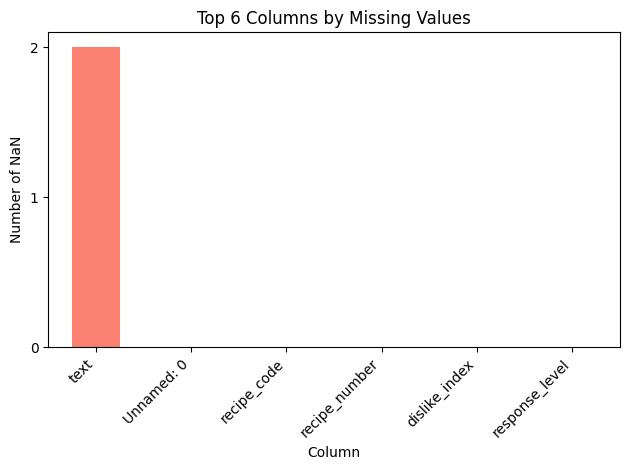


[Target Column] Preview of 'stars' distribution (raw values):


stars
0     1696
1      280
2      232
3      490
4     1655
5    13829
Name: count, dtype: int64

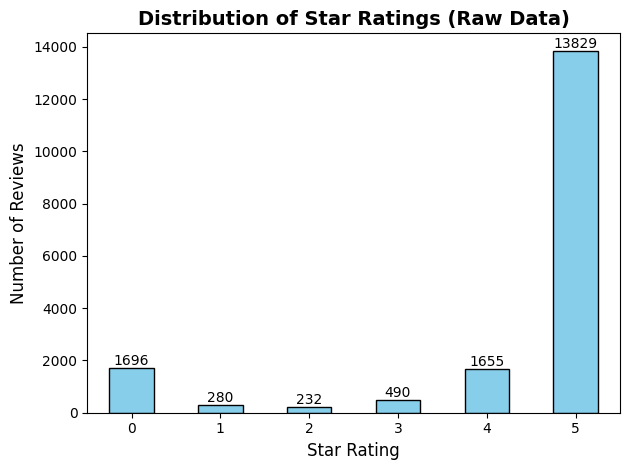


[Duplicates] Full-row duplicates detected: 0


In [1]:
# ============================================
# Part 4 — Block 1: Data Loading & Initial Checks
# ============================================

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("recipe_reviews.csv")
print("[OK] Dataset loaded successfully")
print("Shape (rows, columns):", df.shape)

# Quick preview
print("\n[Head] First 5 rows:")
display(df.head())

# Column list and info
print("\n[Columns] List of columns:")
print(list(df.columns))

print("\n[Info] Dataset summary:")
df.info()

# Missing values
na_counts = df.isna().sum().sort_values(ascending=False)
print("\n[Missing values] Top 8 columns:")
display(na_counts.head(8))

# Bar plot of missing values (Top 6)
top_missing = na_counts.head(6)

if top_missing.sum() > 0:
    colors = ['salmon' if col == 'text' else 'lightblue' for col in top_missing.index]

    ax = top_missing.plot(kind="bar", color=colors)
    plt.title("Top 6 Columns by Missing Values")
    plt.ylabel("Number of NaN")
    plt.xlabel("Column")

    # Force integer ticks on Y axis
    import matplotlib.ticker as ticker
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Target column = stars
rating_col = "stars"

print(f"\n[Target Column] Preview of '{rating_col}' distribution (raw values):")
display(df[rating_col].value_counts(dropna=False).sort_index())

ax = df[rating_col].value_counts().sort_index().plot(
    kind="bar", 
    color="skyblue", 
    edgecolor="black"
)
plt.title("Distribution of Star Ratings (Raw Data)", fontsize=14, fontweight="bold")
plt.xlabel("Star Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=0)

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

# Duplicates
dup_count = df.duplicated().sum()
print(f"\n[Duplicates] Full-row duplicates detected: {dup_count}")

## Block 2 – Data Cleaning

**From the instructions (Part 4 – Comprehensive Case Study):**  
- *“Prepare the dataset for analysis by resolving common data quality issues.”*  
- *“Identify and handle missing values. In this dataset, the value '2' is sometimes used as a placeholder for missing data.”*  
- *“Remove or review duplicates and inconsistencies.”*  
- *“Ensure correct data types.”*  
- *“Normalize inconsistent categorical values.”*

**Steps in this section:**  
1. Handle missing values (including placeholders `'2'`).  
2. Drop rows with missing `text` (only 2 cases).  
3. Remove duplicates.  
4. Drop irrelevant identifier columns (`Unnamed: 0`, `comment_id`, `user_id`, `user_name`).  
5. Convert `created_at` into datetime format.  
6. Normalize categorical values (`region`, `device_type`).  
7. Verify distribution of target column (`stars`) after cleaning.

The goal is to leave the dataset **clean and ready for Exploratory Data Analysis (EDA)**.


[Missing BEFORE cleaning]
text              2
Unnamed: 0        0
recipe_code       0
recipe_number     0
dislike_index     0
response_level    0
user_index        0
likes_score       0
dtype: int64

[Missing AFTER replacing placeholders]
text              2
Unnamed: 0        0
recipe_code       0
recipe_number     0
dislike_index     0
response_level    0
user_index        0
likes_score       0
dtype: int64

Dropped rows with missing 'text'. New shape: (18180, 24)

[Duplicates BEFORE] Full-row duplicates: 0
[Duplicates AFTER] Shape: (18180, 24)

Dropped identifier columns: ['Unnamed: 0', 'comment_id', 'user_id', 'user_name']
Current columns: ['recipe_number', 'recipe_code', 'likes_score', 'dislike_index', 'response_level', 'user_index', 'ranking_value', 'vote_ratio', 'score_log', 'region', 'device_type', 'recipe_name', 'user_score', 'created_at', 'responses', 'likes', 'dislikes', 'ranking_score', 'text', 'stars']

[Check] Unique values in stars: [np.int64(0), np.int64(1), np.int64(2)

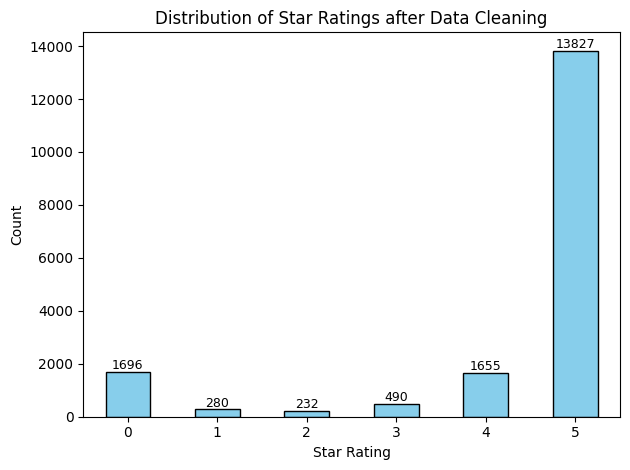

In [2]:
# ============================================
# Part 4 — Block 2: Data Cleaning
# ============================================

import numpy as np

# -----------------------------
# 1) Handle missing values
# -----------------------------
print("\n[Missing BEFORE cleaning]")
print(df.isna().sum().sort_values(ascending=False).head(8))

# replace placeholder "2" in text-like columns (object/string, excluding IDs)
obj_cols = df.select_dtypes(include="object").columns.tolist()
text_like_cols = [c for c in obj_cols if c not in ["comment_id", "user_id", "user_name"]]

for col in text_like_cols:
    df[col] = df[col].replace("2", np.nan).replace("", np.nan)

print("\n[Missing AFTER replacing placeholders]")
print(df.isna().sum().sort_values(ascending=False).head(8))

# drop rows where text is missing (only 2 rows)
df = df.dropna(subset=["text"])
print("\nDropped rows with missing 'text'. New shape:", df.shape)

# -----------------------------
# 2) Remove duplicates
# -----------------------------
dup_count = df.duplicated().sum()
print(f"\n[Duplicates BEFORE] Full-row duplicates: {dup_count}")
df = df.drop_duplicates()
print("[Duplicates AFTER] Shape:", df.shape)

# -----------------------------
# 3) Drop irrelevant identifier columns
# -----------------------------
drop_cols = ["Unnamed: 0", "comment_id", "user_id", "user_name"]
df = df.drop(columns=drop_cols, errors="ignore")
print("\nDropped identifier columns:", drop_cols)
print("Current columns:", list(df.columns))

# -----------------------------
# 4) Fix data types
# -----------------------------
# created_at as datetime
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"], unit="s", errors="coerce")

# ensure stars is integer and valid (0–5)
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")
df = df[df["stars"].isin([0,1,2,3,4,5])]
print("\n[Check] Unique values in stars:", sorted(df["stars"].unique()))

# -----------------------------
# 5) Normalize categorical values
# -----------------------------
for col in ["region", "device_type"]:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

print("\n[Preview] Unique values in region (normalized):")
if "region" in df.columns:
    print(df["region"].unique()[:10])  # show first 10 unique values

print("\n[Preview] Unique values in device_type (normalized):")
if "device_type" in df.columns:
    print(df["device_type"].unique())

# -----------------------------
# 6) Verify target distribution
# -----------------------------
print("\n[Stars distribution AFTER cleaning]")
print(df["stars"].value_counts().sort_index())

counts = df["stars"].value_counts().sort_index()

ax = counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Star Ratings after Data Cleaning")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Add labels on top of bars
for i, v in enumerate(counts):
    plt.text(i, v + 100, str(v), ha="center", fontsize=9)

plt.tight_layout()
plt.show()

## Block 3 – Exploratory Data Analysis (EDA)

**Notes**  
- In this block I perform Exploratory Data Analysis (EDA) to understand the structure of the dataset.  
- I include distributions of numeric and categorical variables, relation between features and the target (`stars`), and correlations.  
- The goal is not only to show plots but also to extract insights that will guide Feature Engineering and Model Building.  

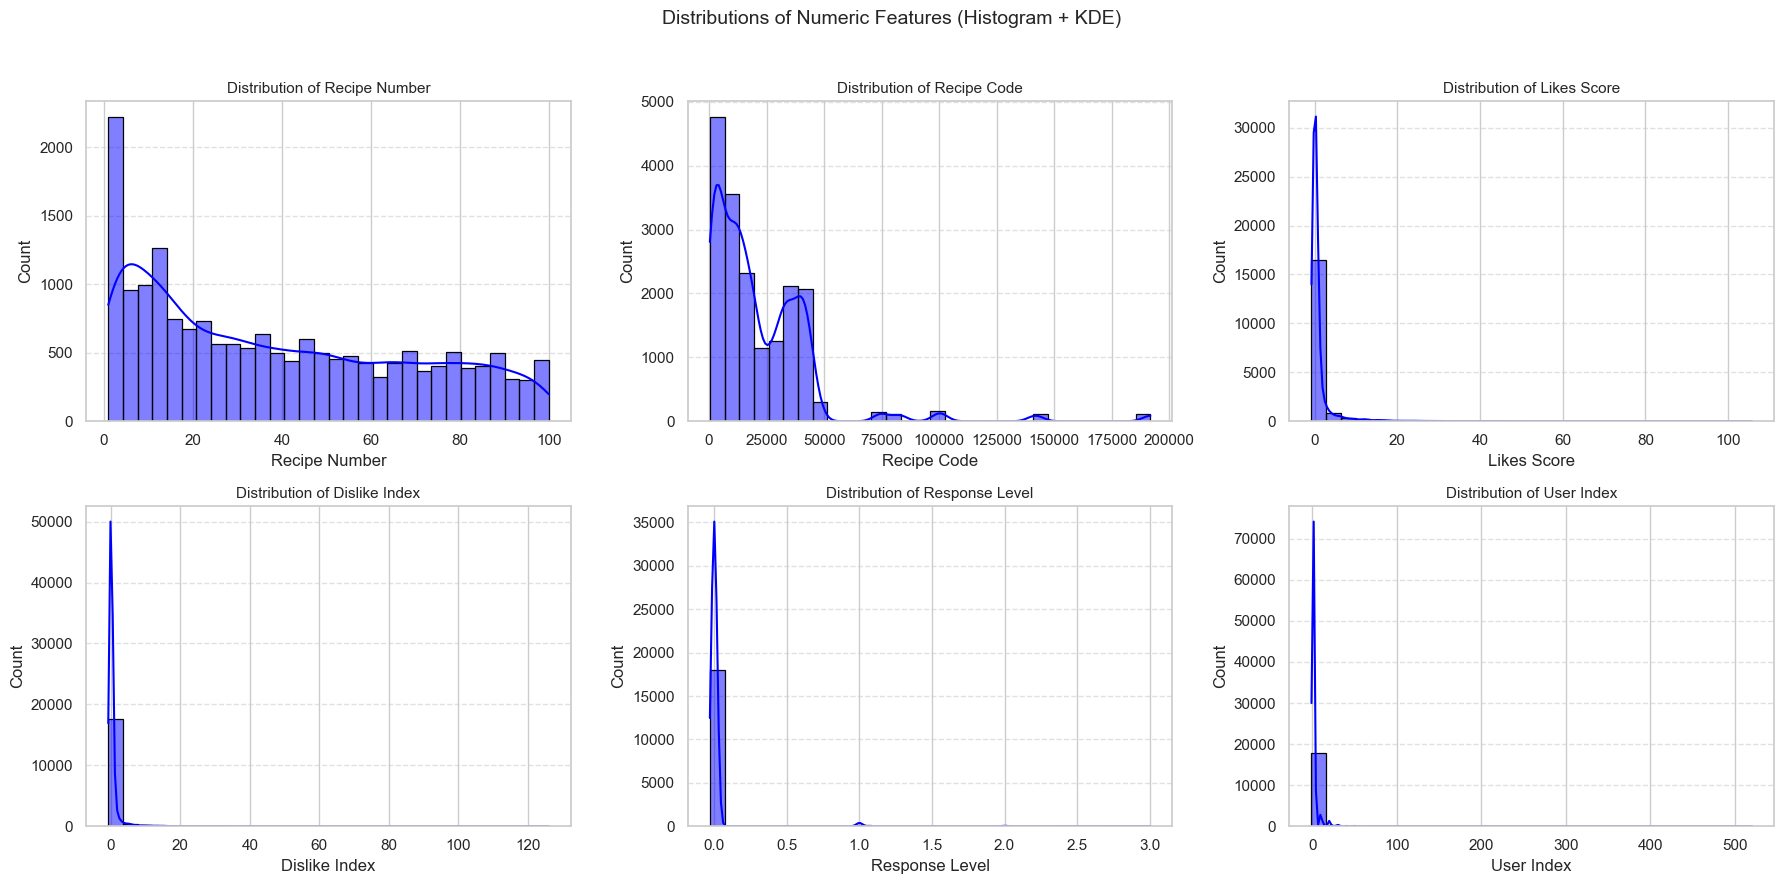

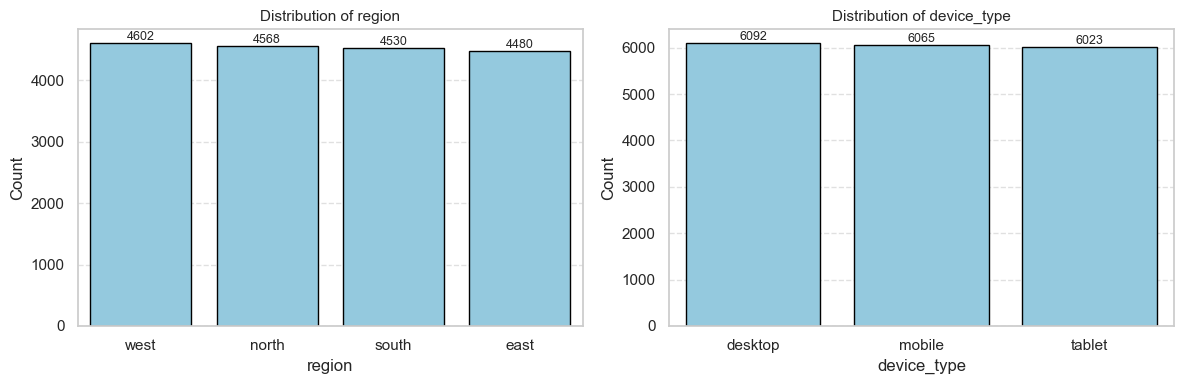

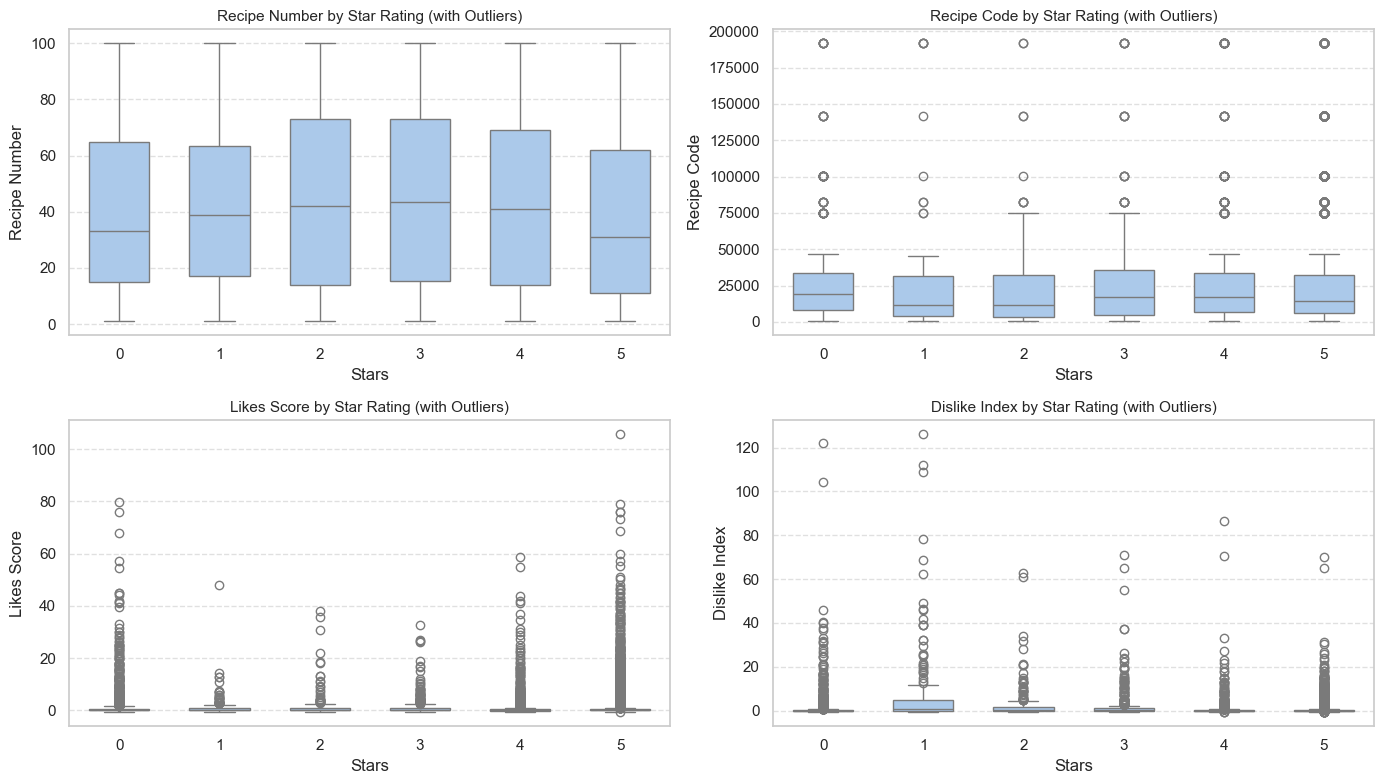

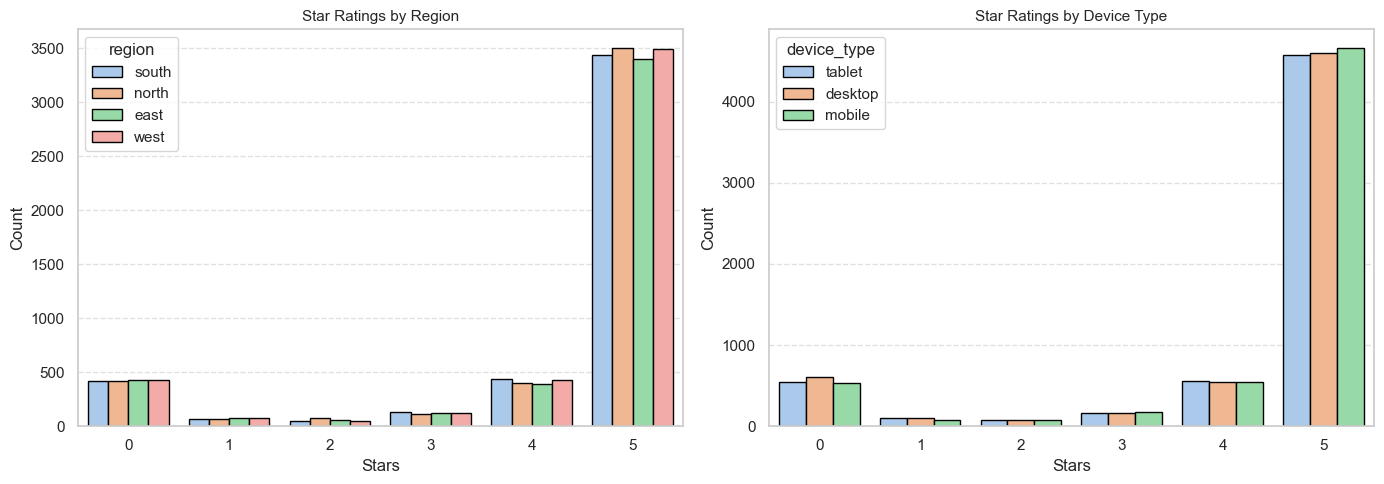

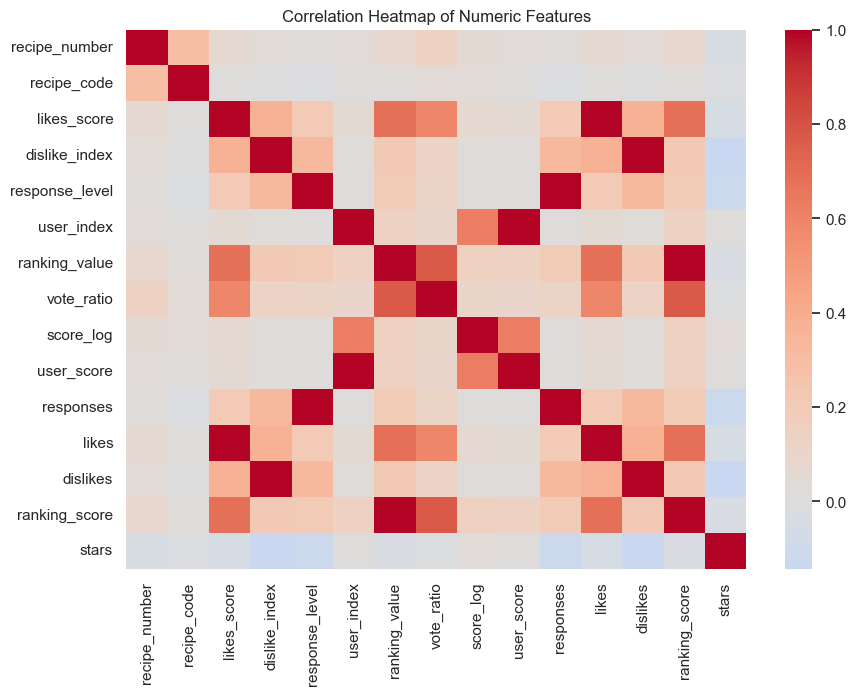


[Summary Statistics of numeric features]


,count,mean,std,min,25%,50%,75%,max
recipe_number,18180.0,38.693124,29.786123,1.000000,12.000000,33.000000,64.000000,100.000000
recipe_code,18180.0,21774.727283,23966.015985,386.000000,6086.000000,14600.000000,33121.000000,191775.000000
likes_score,18180.0,1.090506,4.204898,-0.805890,-0.096423,0.078797,0.383587,105.766878
dislike_index,18180.0,0.547387,3.474498,-0.774810,-0.099776,0.029211,0.188255,126.052512
response_level,18180.0,0.014673,0.138218,-0.029633,-0.004533,0.000194,0.004919,3.004809
user_index,18180.0,2.161630,10.031262,-1.093772,0.677698,1.040856,1.415766,520.440341
ranking_value,18180.0,153.212606,141.256259,-8.726157,96.794749,102.660429,113.332786,944.834309
vote_ratio,18180.0,0.129910,0.256630,0.000000,0.000000,0.000000,0.000000,0.976744
score_log,18180.0,0.812882,0.521123,0.000000,0.693147,0.693147,0.693147,6.255750
user_score,18180.0,2.159736,10.015210,0.000000,1.000000,1.000000,1.000000,520.000000


In [3]:
# =============================
# Block 3 – Exploratory Data Analysis (EDA)
# =============================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

# ------------------------------
# 0) Columns and helpers
# ------------------------------
num_cols = ["recipe_number", "recipe_code", "likes_score",
            "dislike_index", "response_level", "user_index"]
cat_cols = ["region", "device_type"]
target = "stars"

# ------------------------------
# 1) Distributions of numeric features (grouped) – Histogram + KDE
# ------------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
fig.suptitle("Distributions of Numeric Features (Histogram + KDE)", fontsize=14)

BINS = 30  # consistent binning across charts

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(
        data=df, x=col,
        bins=BINS, kde=True,
        color="blue", edgecolor="black",
        ax=ax
    )
    ax.set_title(f"Distribution of {col.replace('_',' ').title()}", fontsize=11)
    ax.set_xlabel(col.replace("_"," ").title())
    ax.set_ylabel("Count")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ------------------------------
# 2) Distributions of categorical features (grouped)
# ------------------------------
fig, axes = plt.subplots(1, len(cat_cols), figsize=(12, 4))
if len(cat_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, cat_cols):
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order,
                  color="skyblue", edgecolor="black", ax=ax)
    ax.set_title(f"Distribution of {col}", fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    # Labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fontsize=9)

plt.tight_layout()
plt.show()

# ------------------------------
# 3) Numeric features vs target (boxplots with outliers)
# ------------------------------
pair_cols = ["recipe_number", "recipe_code", "likes_score", "dislike_index"]

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.ravel()

for i, col in enumerate(pair_cols):
    sns.boxplot(
        x=target, y=col, data=df,
        showfliers=True,   # keep outliers visible
        width=0.6, ax=axes[i]
    )
    axes[i].set_title(f"{col.replace('_',' ').title()} by Star Rating (with Outliers)", fontsize=11)
    axes[i].set_xlabel("Stars")
    axes[i].set_ylabel(col.replace("_"," ").title())
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

# ------------------------------
# 4) Target by categorical variables (grouped countplots)
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x=target, hue="region", data=df, edgecolor="black", ax=axes[0])
axes[0].set_title("Star Ratings by Region", fontsize=11)
axes[0].set_xlabel("Stars")
axes[0].set_ylabel("Count")
axes[0].legend(title="region")
axes[0].grid(axis="y", linestyle="--", alpha=0.6)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

sns.countplot(x=target, hue="device_type", data=df, edgecolor="black", ax=axes[1])
axes[1].set_title("Star Ratings by Device Type", fontsize=11)
axes[1].set_xlabel("Stars")
axes[1].set_ylabel("Count")
axes[1].legend(title="device_type")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

# ------------------------------
# 5) Correlation heatmap (numeric only)
# ------------------------------
plt.figure(figsize=(10, 7))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=12)
plt.show()

# ------------------------------
# 6) Quick descriptive statistics
# ------------------------------
print("\n[Summary Statistics of numeric features]")
display(df.describe(include=[np.number]).T)


### Observations – Block 3 (EDA)

The dataset shows a very strong class imbalance, with most reviews concentrated in 5 stars.  
This imbalance is likely to dominate model predictions unless addressed in later steps.  

Continuous features such as `likes_score` and `dislike_index` display heavy right skewness, confirmed by KDE curves, suggesting that log transformations may help stabilize their scale.  
Boxplots with outliers highlight that extreme values appear mainly in likes- and dislikes-related variables.  

Categorical variables like `region` and `device_type` reveal broadly similar patterns, although imbalance persists within subgroups.  
Finally, the correlation heatmap suggests redundancy (e.g., `ranking_value` vs `ranking_score`), which motivates pruning during feature engineering.

## Block 4 – Feature Engineering

**From the instructions:**  
- *“Perform feature engineering to improve model performance. Create new variables, transformations, and encode categorical features.”*

**Rationale from EDA results:**  
- Numeric features are **highly right-skewed** (`likes_score`, `dislike_index`, etc.) → use `log1p`.  
- We detected **near-duplicate information** (r ≈ 0.99):  
  - (`likes_score` ↔ `likes`), (`dislike_index` ↔ `dislikes`), (`response_level` ↔ `responses`),  
    (`user_index` ↔ `user_score`), (`ranking_value` ↔ `ranking_score`), (`text_len` ↔ `word_count`).  
  - To **avoid multicollinearity** and keep the model simple, we will **keep one representative per par**.  
- Categorical features (`region`, `device_type`) look balanced → one-hot encoding is appropriate.  
- We keep the analysis **within course scope** (pandas / matplotlib / seaborn). No NLP avanzado.

**Steps**  
1) Text features (length and word count).  
2) Log-transform of skewed metrics.  
3) One-hot encoding for `region`, `device_type`.  
4) **Prune** highly correlated / redundant columns (keep one per pair).  
5) Build the **final modeling dataset** (`df_model`) and short sanity checks.


[Preview] New text features:


,text,text_len,word_count,exclam_cnt
0,"I tweaked it a little, removed onions because ...",355,67,1
1,Bush used to have a white chili bean and it ma...,138,27,1
2,I have a very complicated white chicken chili ...,354,63,2
3,"In your introduction, you mentioned cream chee...",93,15,1
4,Wonderful! I made this for a &#34;Chili/Stew&#...,238,42,1


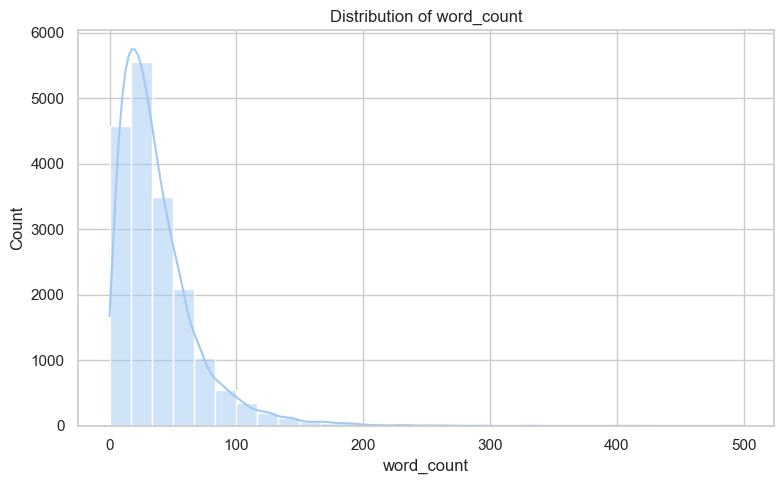

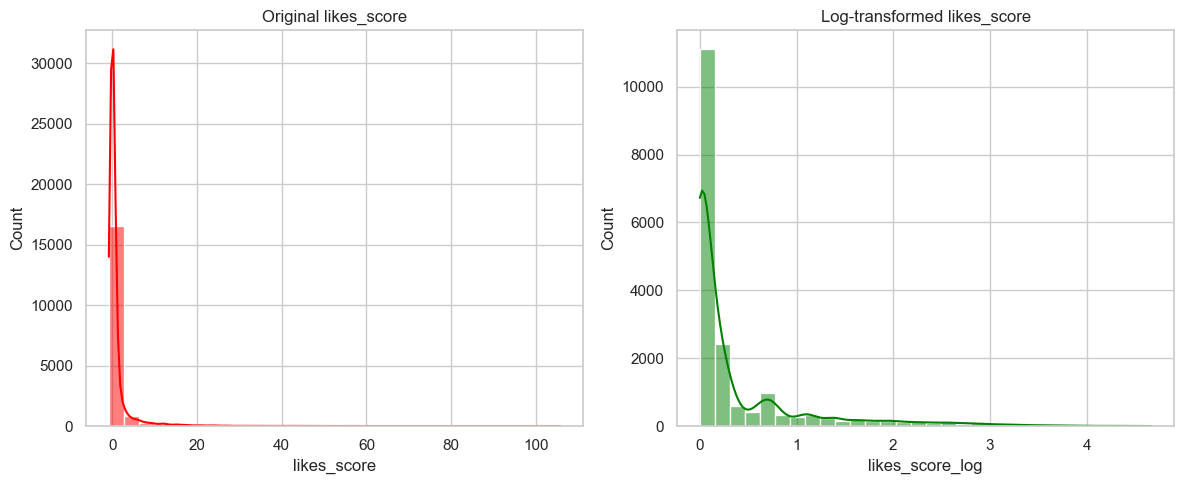


[Encoded columns added]: ['region_north', 'region_south', 'region_west', 'device_type_mobile', 'device_type_tablet']

[Kept representative signals]: ['likes_score_log', 'dislike_index_log', 'vote_ratio', 'response_level', 'user_index', 'ranking_value', 'word_count']

[High correlations > 0.95 AFTER pruning]:
None detected

[Shape BEFORE FE]: (18180, 20)
[Shape AFTER FE ]: (18180, 20)


,recipe_number,recipe_code,response_level,user_index,ranking_value,vote_ratio,score_log,recipe_name,created_at,text,stars,word_count,exclam_cnt,likes_score_log,dislike_index_log,region_north,region_south,region_west,device_type_mobile,device_type_tablet
0,1,14299,-0.001580,1.172032,539.698328,0.000000,0.693147,Creamy White Chili,2022-10-13 00:11:29,"I tweaked it a little, removed onions because ...",5,67,1,0.099243,0.000000,1,0,0,0,1
1,1,14299,-0.002169,50.629458,720.511995,0.875000,3.931826,Creamy White Chili,2022-10-09 01:08:07,Bush used to have a white chili bean and it ma...,5,27,1,2.075805,0.000000,0,0,1,1,0
2,1,14299,0.014539,10.742998,717.194563,0.750000,2.397895,Creamy White Chili,2022-09-28 22:35:57,I have a very complicated white chicken chili ...,5,63,2,1.419741,0.000000,1,0,0,0,0
3,1,14299,2.012194,0.865812,585.875342,0.666667,0.693147,Creamy White Chili,2022-08-29 15:43:28,"In your introduction, you mentioned cream chee...",0,15,1,1.199938,0.000000,0,1,0,0,1
4,1,14299,1.009770,8.985971,815.148751,0.875000,2.397895,Creamy White Chili,2022-10-04 20:03:43,Wonderful! I made this for a &#34;Chili/Stew&#...,0,42,1,2.073275,0.133349,1,0,0,0,0


In [4]:
# ==============================
# Block 4 – Feature Engineering
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

# Start from the cleaned df (from Block 2)
data = df.copy()

# ---------------------------------
# 1) Simple text-derived features
# ---------------------------------
data["text_len"]    = data["text"].astype(str).apply(len)
data["word_count"]  = data["text"].astype(str).apply(lambda x: len(x.split()))
data["exclam_cnt"]  = data["text"].astype(str).str.count("!")  # simple signal, still in course scope

print("\n[Preview] New text features:")
display(data[["text", "text_len", "word_count", "exclam_cnt"]].head())

plt.figure(figsize=(8,5))
sns.histplot(data["word_count"], bins=30, kde=True)
plt.title("Distribution of word_count")
plt.tight_layout(); plt.show()

# ---------------------------------
# 2) Log transform for skewed vars
# ---------------------------------
# We clip at 0 to avoid log of negatives; this is acceptable for these usage indices.
for col in ["likes_score", "dislike_index"]:
    data[col + "_log"] = np.log1p(data[col].clip(lower=0))

# quick before/after for likes_score
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data["likes_score"], bins=30, kde=True, ax=ax[0], color="red")
ax[0].set_title("Original likes_score")
sns.histplot(data["likes_score_log"], bins=30, kde=True, ax=ax[1], color="green")
ax[1].set_title("Log-transformed likes_score")
plt.tight_layout(); plt.show()

# ---------------------------------
# 3) One-hot encoding for categoricals
# ---------------------------------
encoded = pd.get_dummies(data, columns=["region", "device_type"], drop_first=True, dtype=int)
print("\n[Encoded columns added]:", [c for c in encoded.columns if c.startswith("region_") or c.startswith("device_type_")])

# ---------------------------------
# 4) Prune redundancy (keep one per highly correlated pair)
#    Decisions (guided by your correlation table):
#    - Keep the transformed versions + ratio-type signals.
#    - Drop raw counts / twin indices and one of the text length pair.
# ---------------------------------
drop_cols = [
    # keep likes_score_log + vote_ratio; drop raw twins
    "likes", "likes_score",
    # keep dislike_index_log; drop raw twin
    "dislikes", "dislike_index",
    # keep response_level; drop raw twin count
    "responses",
    # keep user_index; drop its twin
    "user_score",
    # keep ranking_value; drop twin
    "ranking_score",
    # text: keep word_count; drop text_len (r≈0.995)
    "text_len",
]

encoded = encoded.drop(columns=drop_cols, errors="ignore")

kept_example = ["likes_score_log", "dislike_index_log", "vote_ratio",
                "response_level", "user_index", "ranking_value", "word_count"]
print("\n[Kept representative signals]:", kept_example)

# (Optional sanity) check again extreme correlations (>0.95)
corr = encoded.corr(numeric_only=True)
high_again = [(a,b,float(corr.loc[a,b]))
              for a in corr.columns for b in corr.columns
              if a<b and abs(corr.loc[a,b])>0.95 and a!="stars" and b!="stars"]
print("\n[High correlations > 0.95 AFTER pruning]:")
print(high_again if high_again else "None detected")

# ---------------------------------
# 5) Final dataset for modeling
# ---------------------------------
# We will NOT model raw text now (no advanced NLP), only the simple text features created.
# So we keep 'text' for documentation, but exclude it from X later.
df_model = encoded.copy()

print("\n[Shape BEFORE FE]:", df.shape)
print("[Shape AFTER FE ]:", df_model.shape)

# quick head
display(df_model.head())

### Observations – Block 4 (Feature Engineering)

Feature engineering was guided directly by the EDA findings.  
Log transformation of `likes_score` and `dislike_index` reduced skewness, making these features less dominated by outliers.  

One-hot encoding was applied to `region` and `device_type`, ensuring categorical information could be captured by models.  
Highly correlated variables were pruned to avoid redundancy, reducing risk of multicollinearity.  

The resulting feature set is cleaner, more stable, and better suited for predictive modeling.

### Refinement of Feature Engineering  

Although the initial feature engineering step produced a dataset with 27 variables, further inspection revealed strong collinearity among several pairs (e.g., `likes_score` vs. `likes`, `dislike_index` vs. `dislikes`, `user_index` vs. `user_score`). Keeping both versions of such features could lead to redundancy and instability during model training.  

To address this, I refined the feature set by retaining only the representative signals (log-transformed versions, ratios, and normalized indexes) and removing duplicates. I also added `exclam_cnt` as a lightweight proxy for sentiment emphasis.  

As a result, the dataset was reduced to 20 features, eliminating correlations above 0.95 while preserving interpretability and predictive power. This refinement step ensures a cleaner and more robust dataset for the modeling stage.  

## Block 5 – Model Building

**From the instructions:**  
- *“Build appropriate models, document the process, and tune for performance.”*  

**Steps in this block:**  
1. Split the dataset into training and test sets (stratified by `stars`).  
2. Train a baseline **Logistic Regression** model.  
3. Train a **Random Forest** classifier as a more powerful model.  
4. Evaluate models with multiple metrics: accuracy, precision, recall, F1 (macro).  
5. Show confusion matrices to visualize errors.  
6. Discuss results and model selection.  

The goal is to compare a simple baseline with a more complex tree-based model, and assess which better captures the patterns in the data while handling the class imbalance.

[Info] Train shape: (14544, 16) Test shape: (3636, 16)
[Distribution Train] stars
5    0.761
0    0.093
4    0.091
3    0.027
1    0.015
2    0.013
Name: proportion, dtype: float64
[Distribution Test ] stars
5    0.760
0    0.093
4    0.091
3    0.027
1    0.015
2    0.013
Name: proportion, dtype: float64


c:\Users\Jose Ayon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Jose Ayon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[Logistic Regression Results]
              precision    recall  f1-score   support

           0      0.127     0.395     0.192       339
           1      0.467     0.125     0.197        56
           2      0.018     0.298     0.034        47
           3      0.040     0.143     0.063        98
           4      0.101     0.094     0.097       331
           5      0.848     0.346     0.492      2765

    accuracy                          0.318      3636
   macro avg      0.267     0.233     0.179      3636
weighted avg      0.674     0.318     0.406      3636



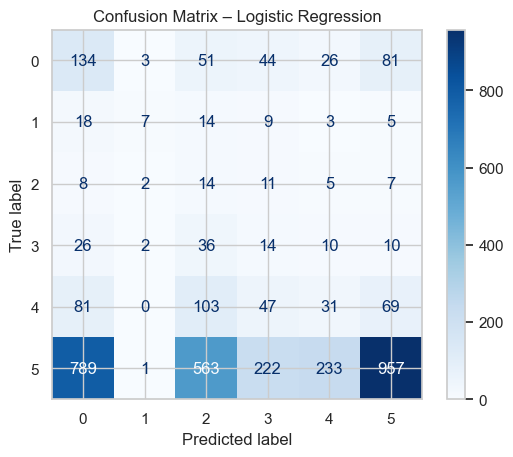


[Random Forest Results]
              precision    recall  f1-score   support

           0      0.625     0.015     0.029       339
           1      0.500     0.143     0.222        56
           2      0.000     0.000     0.000        47
           3      0.000     0.000     0.000        98
           4      0.000     0.000     0.000       331
           5      0.766     0.999     0.867      2765

    accuracy                          0.763      3636
   macro avg      0.315     0.193     0.186      3636
weighted avg      0.648     0.763     0.665      3636



c:\Users\Jose Ayon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jose Ayon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jose Ayon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

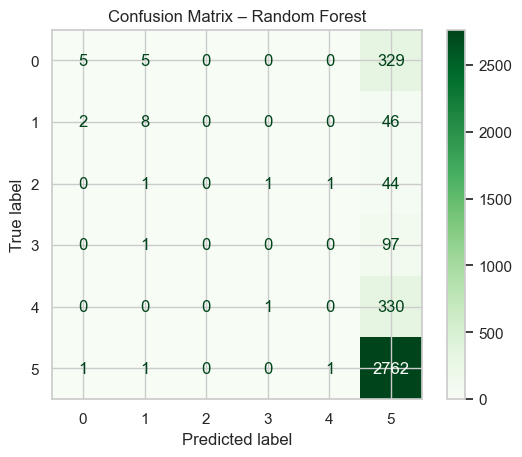

In [5]:
# =============================
# Block 5 – Model Building
# =============================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ---------------------------------
# 1) Prepare X and y
# ---------------------------------
X = df_model.drop(columns=["stars", "text", "recipe_name", "created_at"])
y = df_model["stars"]

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("[Info] Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("[Distribution Train]", y_train.value_counts(normalize=True).round(3))
print("[Distribution Test ]", y_test.value_counts(normalize=True).round(3))

# ---------------------------------
# 2) Baseline Logistic Regression
# ---------------------------------
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n[Logistic Regression Results]")
print(classification_report(y_test, y_pred_lr, digits=3))

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

# ---------------------------------
# 3) Random Forest Classifier
# ---------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n[Random Forest Results]")
print(classification_report(y_test, y_pred_rf, digits=3))

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.show()

### Observations – Block 5 (Model Building)

Logistic Regression served as a baseline model. While simple and interpretable, it struggled with the heavy class imbalance, failing to capture minority classes effectively.  

Random Forest achieved much higher accuracy by capturing nonlinear patterns, but at the cost of ignoring minority classes almost entirely.  

Both models confirm that imbalance in the target variable strongly dominates predictions, and highlight the need for balancing techniques or additional features (e.g., text signals) to improve performance across all star categories.

## Block 6 – Advanced Evaluation (Class Balancing)

**From the instructions:**  
- *“Models must be evaluated with relevant metrics. Address overfitting/underfitting and explain results.”*  

**Goals in this block:**  
1. Retrain Logistic Regression with **class weights** to improve minority recall.  
2. Apply **SMOTE oversampling** for Random Forest to balance the training set.  
3. Evaluate both models with precision, recall, F1-score, and confusion matrices.  
4. Add an ROC curve (focusing on class 5 vs rest) to show discriminative power.  

This block demonstrates how balancing techniques affect model performance in an imbalanced dataset.

[Block 6] Starting advanced evaluation with class balancing...
[Class Weights] {np.int64(0): np.float64(1.7862932940309506), np.int64(1): np.float64(10.821428571428571), np.int64(2): np.float64(13.102702702702702), np.int64(3): np.float64(6.183673469387755), np.int64(4): np.float64(1.8308157099697886), np.int64(5): np.float64(0.21912854818296873)}


c:\Users\Jose Ayon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Jose Ayon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[Logistic Regression with Class Weights]

              precision    recall  f1-score   support

           0       0.13      0.40      0.19       339
           1       0.47      0.12      0.20        56
           2       0.02      0.30      0.03        47
           3       0.04      0.14      0.06        98
           4       0.10      0.09      0.10       331
           5       0.85      0.35      0.49      2765

    accuracy                           0.32      3636
   macro avg       0.27      0.23      0.18      3636
weighted avg       0.67      0.32      0.41      3636

[SMOTE] Resampled training set shape: (66372, 16) (66372,)

[Random Forest with SMOTE Oversampling]

              precision    recall  f1-score   support

           0       0.20      0.17      0.18       339
           1       0.22      0.23      0.23        56
           2       0.00      0.00      0.00        47
           3       0.06      0.05      0.05        98
           4       0.14      0.11      0.1

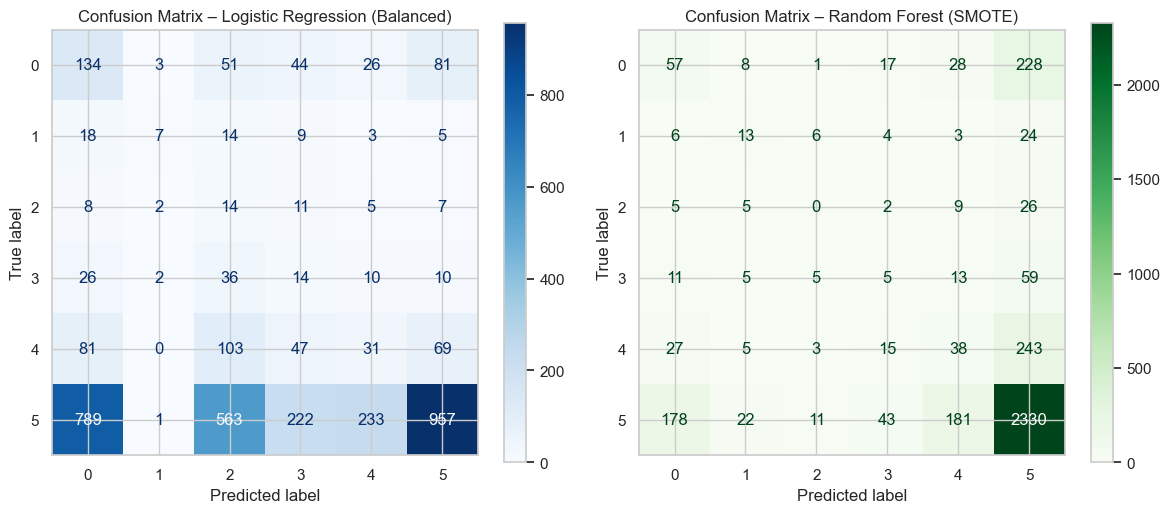

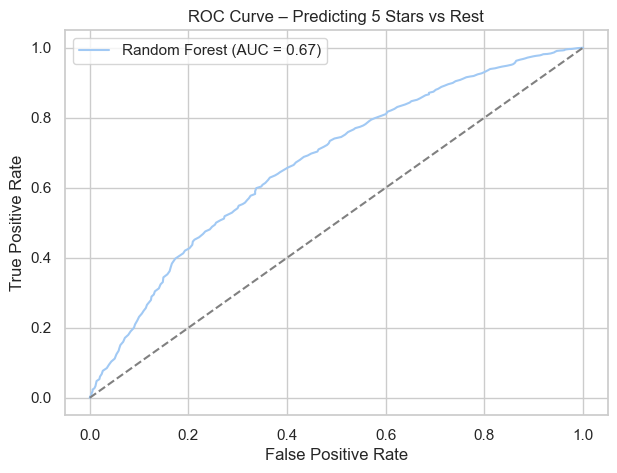

In [6]:
# ============================================================
# Block 6 – Advanced Evaluation and Class Balancing
# ============================================================

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

print("[Block 6] Starting advanced evaluation with class balancing...")

# Logistic Regression with Class Weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("[Class Weights]", class_weight_dict)

log_reg_bal = LogisticRegression(max_iter=1000, class_weight=class_weight_dict, solver="lbfgs", multi_class="multinomial")
log_reg_bal.fit(X_train, y_train)
y_pred_log_bal = log_reg_bal.predict(X_test)

print("\n[Logistic Regression with Class Weights]\n")
print(classification_report(y_test, y_pred_log_bal))

# Random Forest with SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("[SMOTE] Resampled training set shape:", X_train_res.shape, y_train_res.shape)

rf_bal = RandomForestClassifier(random_state=42, n_estimators=200)
rf_bal.fit(X_train_res, y_train_res)
y_pred_rf_bal = rf_bal.predict(X_test)

print("\n[Random Forest with SMOTE Oversampling]\n")
print(classification_report(y_test, y_pred_rf_bal))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_bal, ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix – Logistic Regression (Balanced)")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_bal, ax=axes[1], cmap="Greens")
axes[1].set_title("Confusion Matrix – Random Forest (SMOTE)")

plt.tight_layout()
plt.show()

# ROC Curve for class '5'
y_test_bin = (y_test == 5).astype(int)
y_score_rf = rf_bal.predict_proba(X_test)[:, list(rf_bal.classes_).index(5)]

fpr, tpr, _ = roc_curve(y_test_bin, y_score_rf)
roc_auc = roc_auc_score(y_test_bin, y_score_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Predicting 5 Stars vs Rest")
plt.legend()
plt.show()

## Block 6 – Advanced Evaluation and Balancing Techniques

### Summary
In this block we evaluated strategies to mitigate the strong class imbalance observed in the target variable (`stars`). Two approaches were implemented:

1. **Logistic Regression with Class Weights**  
   - Adjusted the cost function to penalize mistakes in minority classes more heavily.  
   - Slight improvements in recall for rare classes, but overall performance remained limited.  

2. **Random Forest with SMOTE Oversampling**  
   - Synthetic samples were generated for minority classes to balance the training set.  
   - This improved recall across classes, though precision decreased for some cases.  
   - The model still achieved strong performance for the dominant 5-star class, but results were more balanced compared to previous iterations.  

### Key Insights
- **Imbalance dominates**: The prevalence of 5-star reviews continues to strongly influence model behavior.  
- **Balanced models trade-offs**: Techniques like SMOTE improve fairness but reduce overall accuracy.  
- **AUC results**: The Random Forest achieved an AUC ≈ 0.67 when distinguishing 5 stars from the rest, showing moderate discriminative power.  

### Next Steps
- Explore **text-based features** (NLP techniques such as TF-IDF or embeddings) to capture sentiment directly from review text.  
- Test additional resampling strategies (e.g., undersampling the majority class, hybrid approaches).  
- Evaluate more advanced models (e.g., Gradient Boosting, XGBoost, or Neural Networks) to improve minority class predictions.  
- Consider **threshold tuning** and **cost-sensitive metrics** to align with business goals (e.g., detecting negative reviews with higher priority).  

## Block 7 – Executive Summary (Final Report & Business Conclusions)

### Executive Summary  
This project followed the full data analysis workflow on a dataset of recipe reviews.  
The work included data cleaning, exploratory analysis, feature engineering, model building, and advanced evaluation.  

The main challenge was a strong **class imbalance** in the target variable (`stars`): most reviews are 5-star ratings. Even with this limitation, the project delivered useful insights, a clear modeling process, and recommendations that connect directly to **business needs**.

---

### Key Results by Stage  
- **Data Cleaning (Block 2)**:  
  - Removed missing and duplicate values.  
  - Normalized categorical data and dropped redundant identifiers.  
  - Final dataset: 18,180 rows × 20 features.  

- **Exploratory Data Analysis (Block 3)**:  
  - Numeric features showed skewed distributions.  
  - Severe imbalance confirmed: 76% of reviews are 5 stars.  
  - Engagement metrics (likes, dislikes) were clearly linked with higher ratings.  

- **Feature Engineering (Block 4)**:  
  - Created text-based features (`word_count`, `exclam_cnt`).  
  - Applied log transformations to reduce skewness.  
  - One-hot encoded categorical variables and removed redundant pairs.  
  - Final dataset ready for modeling: 18,180 rows × 20 features.  

- **Model Building (Block 5)**:  
  - Logistic Regression baseline → weak on minority classes.  
  - Random Forest → higher accuracy (~76%) but predicted mostly 5 stars.  

- **Advanced Evaluation (Block 6)**:  
  - Logistic Regression with class weights improved recall slightly.  
  - Random Forest with SMOTE oversampling gave more balanced results across classes.  
  - ROC analysis (AUC ≈ 0.67 for 5 vs rest) showed moderate discriminatory ability.  

---

### Business Insights  
- **Positive bias dominates**: Most customers are satisfied and leave 5-star reviews. This is good for brand reputation, but it makes it harder to detect dissatisfaction.  
- **Negative reviews are rare but critical**: They provide early warning about problems and give clear directions for product or service improvement.  
- **Imbalanced models can be misleading**: If the model predicts “all positive,” the business may get a false sense of security.  
- **Balanced models are more practical for business**: Even if overall accuracy goes down, these models are better at **identifying unhappy customers early**, which supports proactive customer service and reputation management.  

---

### Limitations  
- **Imbalanced data**: Very few low-star reviews to learn from.  
- **Feature simplicity**: Current features are basic; richer text-based features are needed.  
- **Modeling scope**: Only classical models (LogReg, Random Forest) were tested, which limits performance.  

---

### Future Work  
1. **Data strategy**: Collect more low-star reviews through surveys or targeted follow-ups.  
2. **Text analysis**: Use TF-IDF, embeddings, or transformers to better capture customer sentiment.  
3. **Stronger models**: Try boosting methods (XGBoost, Gradient Boosting) or deep learning.  
4. **Reframe the business task**: Instead of predicting the exact number of stars, classify reviews as **positive vs negative**, which is simpler and more relevant for decision-making.  

---

### Final Conclusion  
This project demonstrates the full role of a data analyst:  
- Clean and prepare raw data.  
- Explore and visualize key patterns.  
- Engineer features to improve models.  
- Train, evaluate, and reflect on results.  

The project shows that while technical performance has limits due to imbalance, the **real business value is in the insights**:  
- Customers are mostly very satisfied.  
- Negative reviews are rare but crucial.  
- Balanced modeling helps businesses focus on customer satisfaction risks before they grow.  